In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data=pd.read_csv('data2.csv', delimiter=',',names = ['Pretest_Result','Test_Result','SSC_Result'])
data.head()


,Pretest_Result,Test_Result,SSC_Result
0,0.46,0.66,0.68
1,0.55,0.78,0.75
2,0.33,0.85,0.85
3,0.60,0.90,0.93
4,0.80,0.95,0.98


In [65]:
x1=data.Pretest_Result
x2=data.Test_Result
y=data.SSC_Result

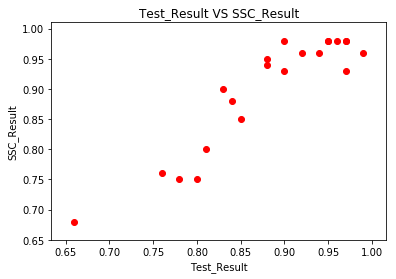

In [66]:
plt.scatter(x2,y, color = 'red') 
plt.title('Test_Result VS SSC_Result')
plt.xlabel('Test_Result')
plt.ylabel('SSC_Result')
plt.show()

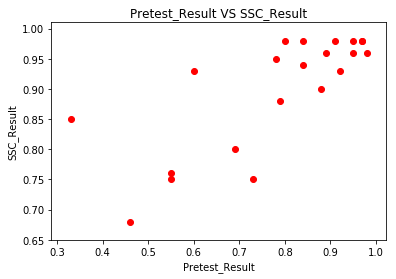

In [67]:
plt.scatter(x1,y, color = 'red') 
plt.title('Pretest_Result VS SSC_Result')
plt.xlabel('Pretest_Result')
plt.ylabel('SSC_Result')
plt.show()

In [68]:
def DM1(m1,m2,c,x1,x2,y):
    s=0
    for i in range(len(x1)):
        s+=x1[i]*(y[i]-m1*x1[i]-m2*x2[i]-c)
    return -(2/len(x1))*s

In [69]:
def DM2(m1,m2,c,x1,x2,y):
    s=0
    for i in range(len(x1)):
        s+=x2[i]*(y[i]-m1*x1[i]-m2*x2[i]-c)
    return -(2/len(x1))*s

In [70]:
def DC(m1,m2,c,x1,x2,y):
    s=0
    for i in range(len(x1)):
        s+=(y[i]-m1*x1[i]-m2*x2[i]-c)
    return -(2/len(x1))*s

In [71]:
def error(m1,m2,c,x1,x2,y):
    s=0
    for i in range(len(x1)):
        y1=m1*x1[i]+m2*x2[i]+c
        s+=(y1-y[i])**2
    return (1/len(x1))*s

In [72]:
def GD(x1,x2,y):
    E=[]
    m1=0
    m2=0
    c=0
    ep=1000
    L=0.01
    for i in range(ep):
        er=error(m1,m2,c,x1,x2,y)
        E.append(er)
        dm1=DM1(m1,m2,c,x1,x2,y)
        dm2=DM2(m1,m2,c,x1,x2,y)
        dc=DC(m1,m2,c,x1,x2,y)
        m1-=L*dm1
        m2-=L*dm2
        c-=L*dc
        #print(m,c)
    return m1,m2,c,E

In [73]:
m1,m2,c,e=GD(x1,x2,y)
print(m1,m2,c)
#print(e)

0.27917207097353397 0.356581354155798 0.36739471494456677


In [74]:
PR=[]
for i in range(len(x1)):
    y1=m1*x1[i]+x2[i]*m2+c
    PR.append(y1)
print(PR)

[0.731157561335219, 0.799072810221533, 0.7626156493982613, 0.8558211762689054, 0.929484658171402, 0.7919411831384169, 0.8488543407825015, 0.8564554100798849, 0.8874689885045289, 0.909028661350589, 0.9156908462194375, 0.8989405219610255, 0.9510443310174621, 0.9477831680934593, 0.9606630281927582, 0.9769439102369027, 0.99399888511287, 0.9805097237784608, 0.9423645182707009, 0.9701169337713421, 0.9784920959005481]


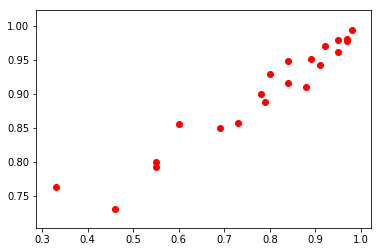

In [75]:
plt.scatter(x1,PR, color = 'red')
plt.show()

In [78]:
t1=eval(input("Enter Pretest Result :"))/100
t2=eval(input("Enter Test Result :"))/100
p = m1*t1+m2*t2+c
print('S.S.C Result :',int(p*100),'%')

Enter Pretest Result :55
Enter Test Result :60
S.S.C Result : 73 %
